Fonction de transfert en boucle ouverte :
<TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  26.64
----------
0.23 s + 1



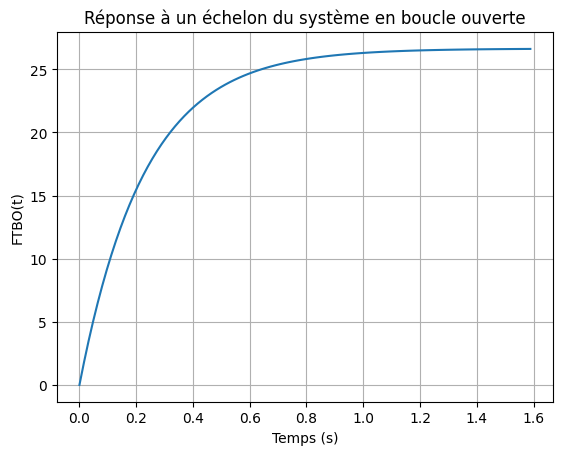

Fonction de transfert du correcteur PI :
<TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.00023 s + 0.01
----------------
    0.023 s



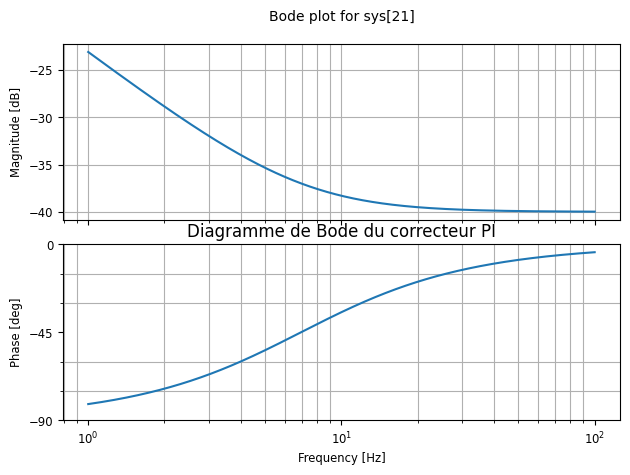

Marge de gain : inf dB
Marge de phase : 42.26°
Fréquence de gain : nan rad/s
Fréquence de phase : 6.51 rad/s


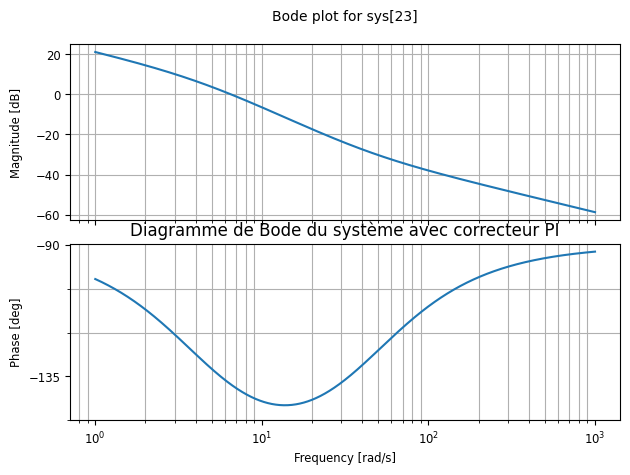

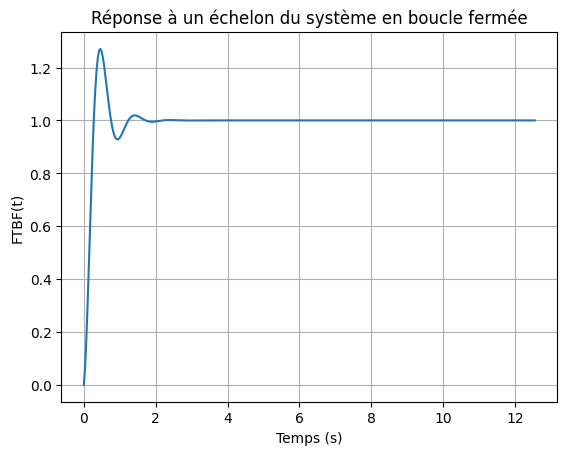

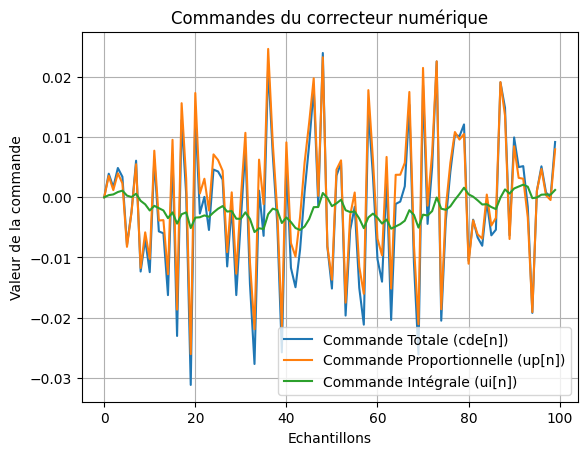

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from control import *

#================================================= MOTOR LEFT
#=================================================
# CARACTERISTIQUES DU 1er ORDRE IDENTIFIE

G = 1332 / 50  # Gain du système
tau = 230*10**-3  # Constante de temps
#=================================================
# SYSTEME A ASSERVIR ( EN BOUCLE OUVERTE )
FTBO = tf([G], [tau, 1]) 

print("Fonction de transfert en boucle ouverte :")
print(FTBO)

# Réponse à un échelon du système
t, y = step_response(FTBO)
plt.figure()
plt.plot(t, y)
plt.grid()
plt.title("Réponse à un échelon du système en boucle ouverte")
plt.xlabel('Temps (s)')
plt.ylabel('FTBO(t)')
plt.show()

#=================================================
# CORRECTEUR PI
ti = 0.1 * tau  # Temps d'intégration
Kpi = 0.01  # Gain proportionnel

CORR = Kpi * tf([ti, 1], [ti, 0])
print("Fonction de transfert du correcteur PI :")
print(CORR)

# Bode plot pour le correcteur PI
plt.figure()
bode(CORR, Hz=True, dB=True)
plt.title("Diagramme de Bode du correcteur PI")
plt.grid()
plt.show()

#=================================================
# ASSOCIATION CORRECTEUR PI + SYSTEME A ASSERVIR
FTBO_CORR = CORR * FTBO
gm, pm, wg, wp = margin(FTBO_CORR)

print(f"Marge de gain : {gm:.2f} dB")
print(f"Marge de phase : {pm:.2f}°")
print(f"Fréquence de gain : {wg:.2f} rad/s")
print(f"Fréquence de phase : {wp:.2f} rad/s")

# Bode plot pour le système avec correcteur
plt.figure()
bode(FTBO_CORR, dB=True)
plt.title("Diagramme de Bode du système avec correcteur PI")
plt.grid()
plt.show()

#=================================================
# SYSTEME CORRIGE EN BOUCLE FERMEE
FTBF = (CORR * FTBO) / (1 + CORR * FTBO)

# Réponse à un échelon du système corrigé
t, y = step_response(FTBF)

plt.figure()
plt.plot(t, y)
plt.grid()
plt.title("Réponse à un échelon du système en boucle fermée")
plt.xlabel('Temps (s)')
plt.ylabel('FTBF(t)')
plt.show()
#=================================================

#=================================================
# CORRECTEUR NUMERIQUE
# Définition des variables
Kp = 0.01  # Gain proportionnel
Ki = ti / tau  # Gain intégral
Te = 0.01  # Période d'échantillonnage

# Initialisation des signaux
n = 100  # Nombre d'échantillons
up = np.zeros(n)  # Signal de contrôle proportionnel
ui = np.zeros(n)  # Signal de contrôle intégral
cde = np.zeros(n)  # Commande totale
epsilon = np.random.normal(0, 1, n)  # Erreur aléatoire (peut être remplacée par la véritable erreur)

# Boucle de calcul
for i in range(1, n):
    up[i] = Kp * epsilon[i]  # Proportionnel
    ui[i] = ui[i - 1] + Kp * Ki * epsilon[i]  # Intégral
    cde[i] = up[i] + ui[i]  # Commande totale

# Affichage des résultats
plt.figure()
plt.plot(cde, label='Commande Totale (cde[n])')
plt.plot(up, label='Commande Proportionnelle (up[n])')
plt.plot(ui, label='Commande Intégrale (ui[n])')
plt.grid()
plt.title("Commandes du correcteur numérique")
plt.xlabel('Echantillons')
plt.ylabel('Valeur de la commande')
plt.legend()
plt.show()
#=================================================


Fonction de transfert en boucle ouverte :
<TransferFunction>: sys[32]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  25.54
----------
0.21 s + 1



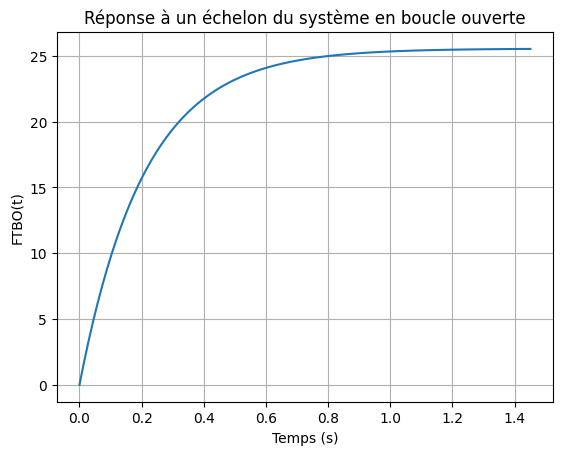

Fonction de transfert du correcteur PI :
<TransferFunction>: sys[37]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.00021 s + 0.01
----------------
    0.021 s



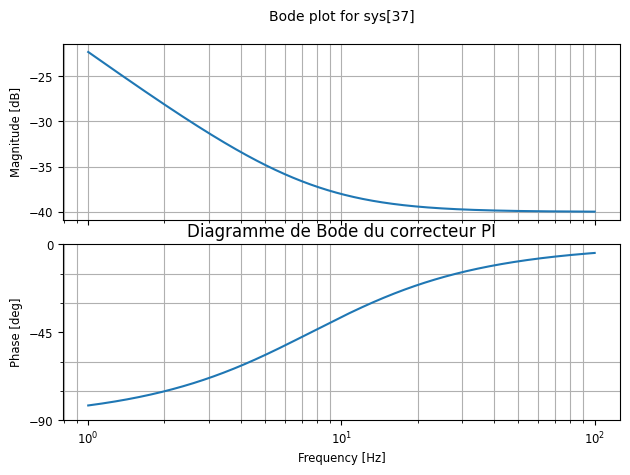

Marge de gain : inf dB
Marge de phase : 42.73°
Fréquence de gain : nan rad/s
Fréquence de phase : 6.95 rad/s


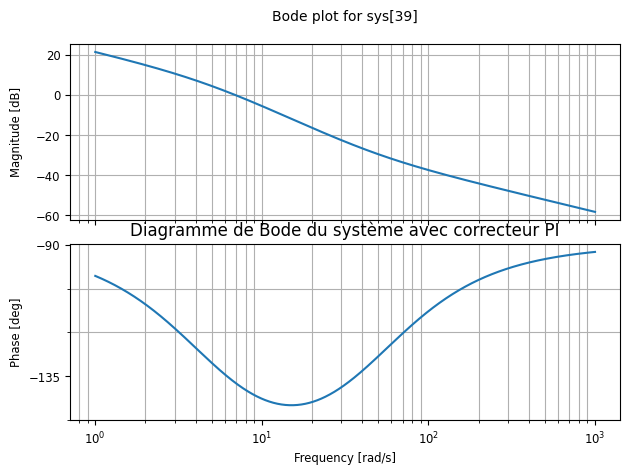

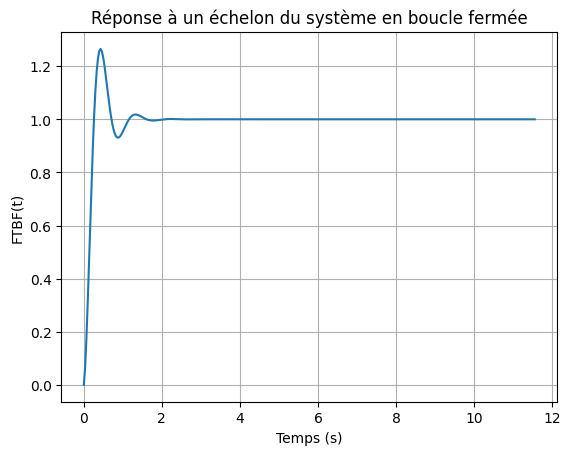

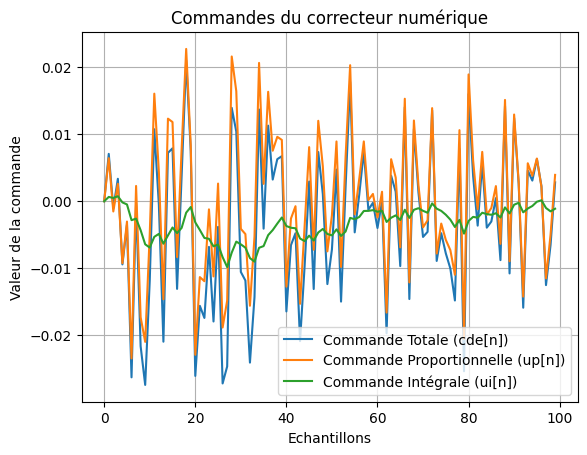

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from control import *

#================================================= MOTOR RIGHT

#=================================================
# CARACTERISTIQUES DU 1er ORDRE IDENTIFIE

G = 1277 / 50  # Gain du système
tau = 210*10**-3  # Constante de temps
#=================================================
# SYSTEME A ASSERVIR ( EN BOUCLE OUVERTE )
FTBO = tf([G], [tau, 1]) 

print("Fonction de transfert en boucle ouverte :")
print(FTBO)

# Réponse à un échelon du système
t, y = step_response(FTBO)
plt.figure()
plt.plot(t, y)
plt.grid()
plt.title("Réponse à un échelon du système en boucle ouverte")
plt.xlabel('Temps (s)')
plt.ylabel('FTBO(t)')
plt.show()

#=================================================
# CORRECTEUR PI
ti = 0.1 * tau  # Temps d'intégration
Kpi = 0.01  # Gain proportionnel

CORR = Kpi * tf([ti, 1], [ti, 0])
print("Fonction de transfert du correcteur PI :")
print(CORR)

# Bode plot pour le correcteur PI
plt.figure()
bode(CORR, Hz=True, dB=True)
plt.title("Diagramme de Bode du correcteur PI")
plt.grid()
plt.show()

#=================================================
# ASSOCIATION CORRECTEUR PI + SYSTEME A ASSERVIR
FTBO_CORR = CORR * FTBO
gm, pm, wg, wp = margin(FTBO_CORR)

print(f"Marge de gain : {gm:.2f} dB")
print(f"Marge de phase : {pm:.2f}°")
print(f"Fréquence de gain : {wg:.2f} rad/s")
print(f"Fréquence de phase : {wp:.2f} rad/s")

# Bode plot pour le système avec correcteur
plt.figure()
bode(FTBO_CORR, dB=True)
plt.title("Diagramme de Bode du système avec correcteur PI")
plt.grid()
plt.show()

#=================================================
# SYSTEME CORRIGE EN BOUCLE FERMEE
FTBF = (CORR * FTBO) / (1 + CORR * FTBO)

# Réponse à un échelon du système corrigé
t, y = step_response(FTBF)

plt.figure()
plt.plot(t, y)
plt.grid()
plt.title("Réponse à un échelon du système en boucle fermée")
plt.xlabel('Temps (s)')
plt.ylabel('FTBF(t)')
plt.show()
#=================================================

#=================================================
# CORRECTEUR NUMERIQUE
# Définition des variables
Kp = 0.01  # Gain proportionnel
Ki = ti / tau  # Gain intégral
Te = 0.01  # Période d'échantillonnage

# Initialisation des signaux
n = 100  # Nombre d'échantillons
up = np.zeros(n)  # Signal de contrôle proportionnel
ui = np.zeros(n)  # Signal de contrôle intégral
cde = np.zeros(n)  # Commande totale
epsilon = np.random.normal(0, 1, n)  # Erreur aléatoire (peut être remplacée par la véritable erreur)

# Boucle de calcul
for i in range(1, n):
    up[i] = Kp * epsilon[i]  # Proportionnel
    ui[i] = ui[i - 1] + Kp * Ki * epsilon[i]  # Intégral
    cde[i] = up[i] + ui[i]  # Commande totale

# Affichage des résultats
plt.figure()
plt.plot(cde, label='Commande Totale (cde[n])')
plt.plot(up, label='Commande Proportionnelle (up[n])')
plt.plot(ui, label='Commande Intégrale (ui[n])')
plt.grid()
plt.title("Commandes du correcteur numérique")
plt.xlabel('Echantillons')
plt.ylabel('Valeur de la commande')
plt.legend()
plt.show()
#=================================================
